This code reads in the Deep Learning network created by running on nutau and nue samples from Dasha.
It is supposed to then create heat maps but I haven't been able to finish that.

This code runs in a python 3.7 conda environment constructed as follows:
- conda create --name tf-gpu tensorflow-gpu keras scikit-learn matplotlib ipykernel nb_conda_kernels [Pillow]
- conda activate tf-gpu
(Pillow is for image manipulation for making heat maps, but I haven't got it to work yet.)

In [1]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
from keras.models import load_model

model = load_model('/home/dup193/work/double_pulse/notebooks/DP_model_1_20epochs.h5')
model.summary()

Using TensorFlow backend.
W0903 19:41:49.225082 140713184929536 deprecation_wrapper.py:119] From /home/dup193/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0903 19:41:49.251137 140713184929536 deprecation_wrapper.py:119] From /home/dup193/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0903 19:41:49.269322 140713184929536 deprecation_wrapper.py:119] From /home/dup193/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0903 19:41:49.359264 140713184929536 deprecation_wrapper.py:119] From /home/dup193/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_sessi

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 296, 56, 32)       832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 148, 28, 32)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 146, 26, 64)       18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 13, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 60736)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                3887168   
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 130       
Total para

In [3]:
info_d = []
info_s = []
data_d = []
data_s = []

for i in range(0,10):
    name_dd = "/home/dup193/work/double_pulse/data/first_attemp_data/Tau05to15PeV_00{0}_data.npy".format(i)
    name_di = "/home/dup193/work/double_pulse/data/first_attemp_data/Tau05to15PeV_00{0}_info.pkl".format(i)
    name_sd = "/home/dup193/work/double_pulse/data/first_attemp_data/Electron05to15PeV_00{0}_data.npy".format(i)
    name_si = "/home/dup193/work/double_pulse/data/first_attemp_data/Electron05to15PeV_00{0}_info.pkl".format(i)
    info_d_temp = pickle.load(open(name_di, "rb"))
    info_s_temp = pickle.load(open(name_si, "rb"))
    data_d_temp = np.load(name_dd ,allow_pickle=True,encoding='bytes')
    data_s_temp = np.load(name_sd ,allow_pickle=True,encoding='bytes')
    info_d = info_d + info_d_temp
    info_s = info_s + info_s_temp
    data_d.append(data_d_temp)    
    data_s.append(data_s_temp)
data_d = np.vstack(data_d)
data_s = np.vstack(data_s)
info_d = np.array(info_d)
info_s = np.array(info_s)

In [4]:
label_d = [[0,1]]*len(data_d)
label_s = [[1,0]]*len(data_s)
label_d = np.array(label_d)
label_s = np.array(label_s)

(34081, 300, 60)
(34081, 2)
[0 1]


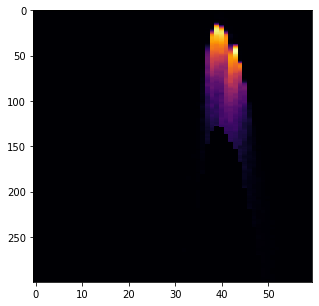

In [5]:
data = np.concatenate((data_d, data_s), axis = 0) 
label = np.concatenate((label_d, label_s), axis = 0) 
print(data.shape)
fig = plt.figure(figsize=(5, 5),facecolor='w')
ax = fig.add_subplot(111)
ax.imshow(data[2], interpolation='nearest', aspect='auto', cmap= 'inferno')
print(label.shape)
print(label[2])

In [7]:
data = data.reshape((len(data),300,60,1))
data = data.astype('float32')/10**-8

(1, 300, 60, 1)


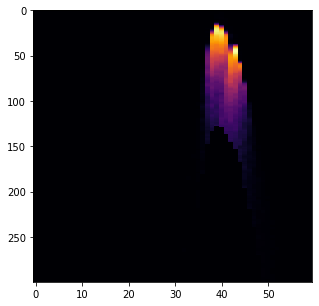

In [8]:
tensor = data[2:3]
print(tensor.shape)
im = tensor.reshape(300,60)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.imshow(im, interpolation='nearest', aspect='auto', cmap= 'inferno')

In [9]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:6]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [11]:
activations = activation_model.predict(tensor)

In [14]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 296, 56, 32)


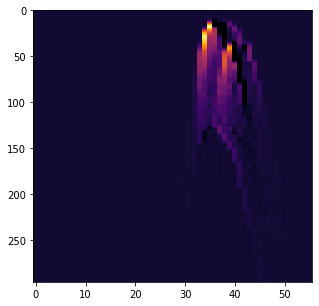

In [15]:
fig = plt.figure(figsize=(5,5),facecolor='w')
ax = fig.add_subplot(111)
ax.imshow(first_layer_activation[0, :, :, 0], interpolation='nearest', aspect='auto', cmap= 'inferno')
plt.show()

['conv2d_3', 'max_pooling2d_3', 'conv2d_4', 'max_pooling2d_4', 'flatten_2', 'dense_3']
conv2d_3 (1, 296, 56, 32)
max_pooling2d_3 (1, 148, 28, 32)
conv2d_4 (1, 146, 26, 64)
max_pooling2d_4 (1, 73, 13, 64)
flatten_2 (1, 60736)


IndexError: tuple index out of range

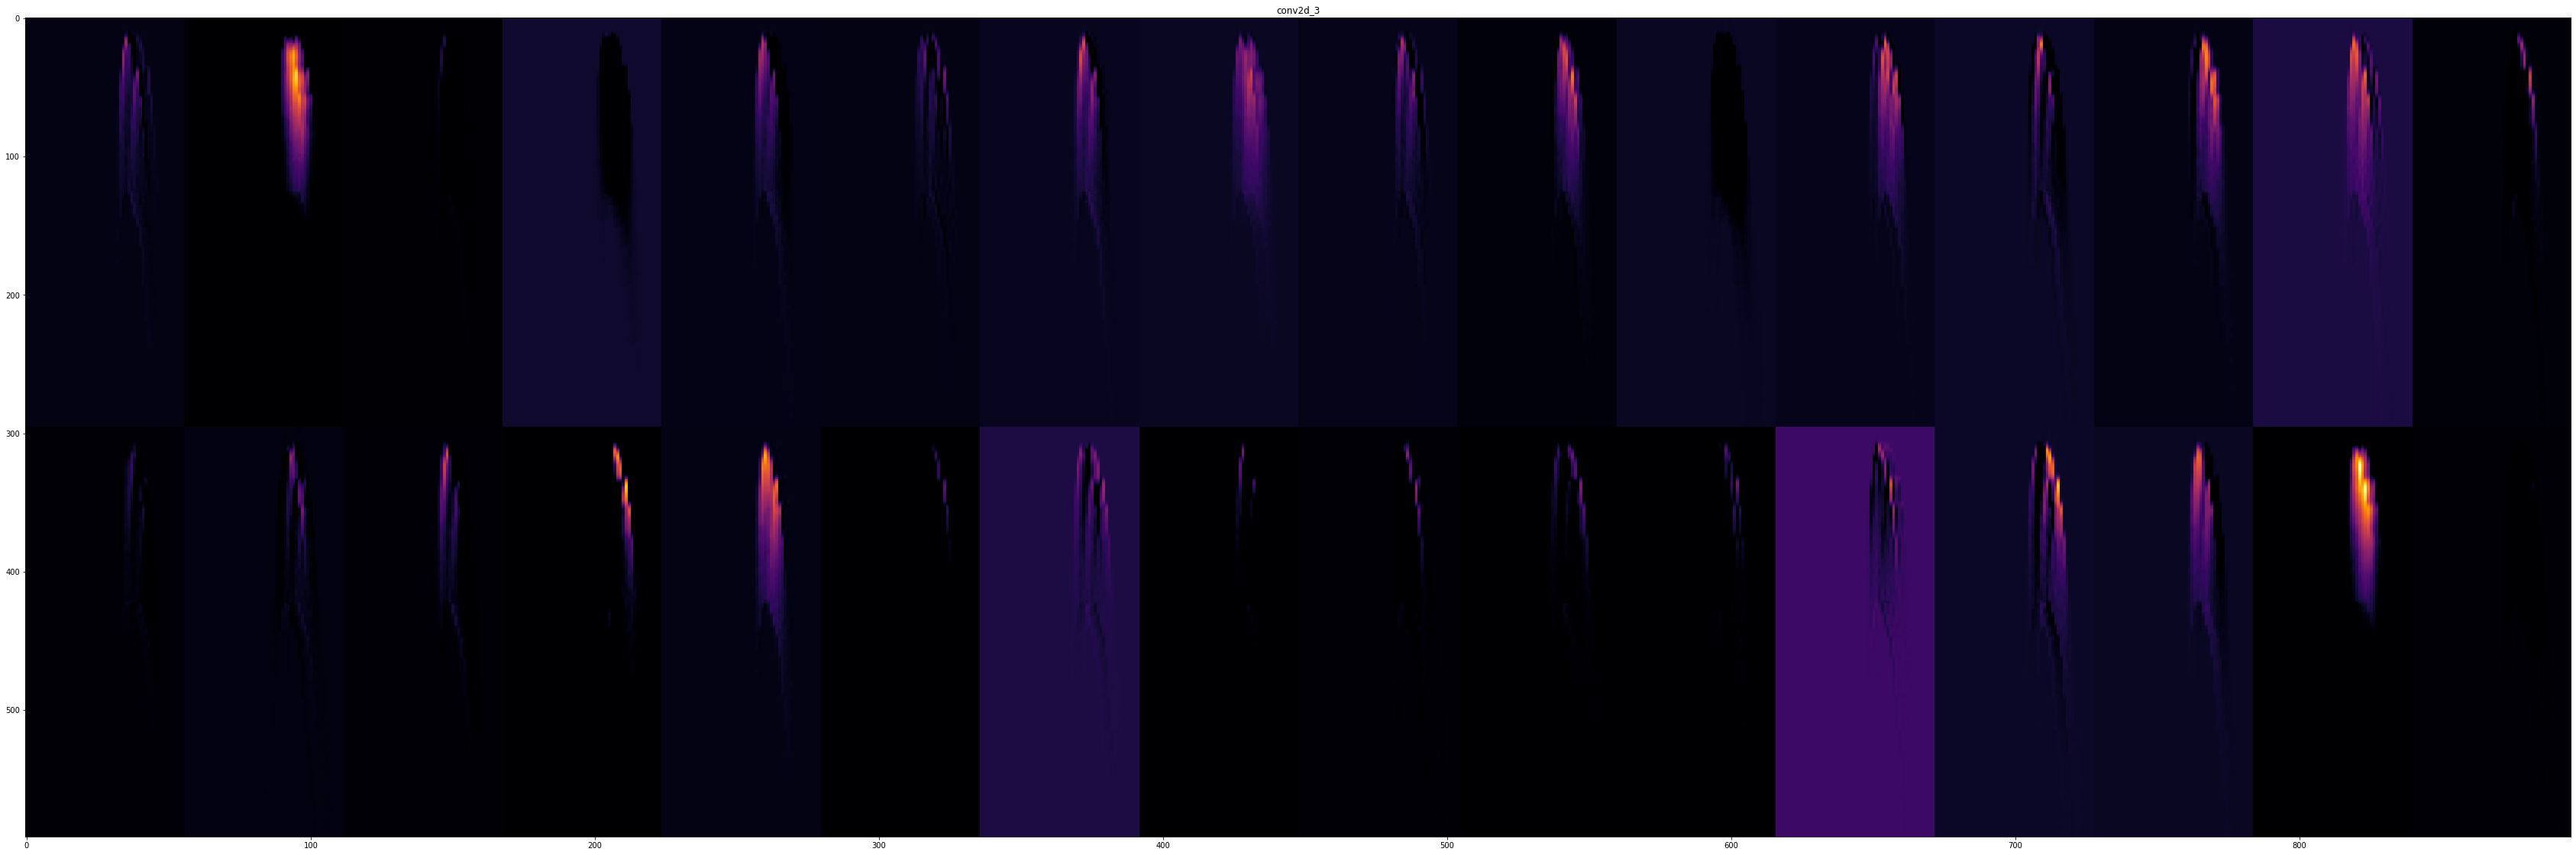

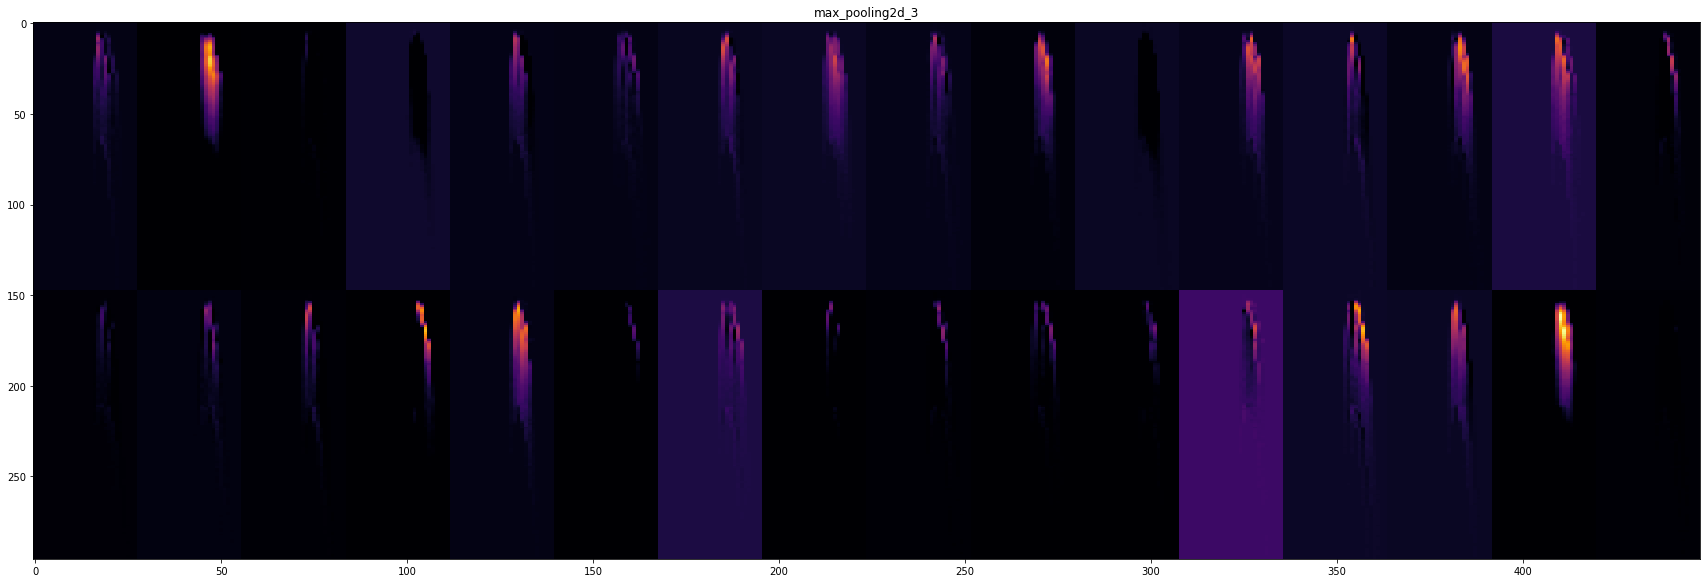

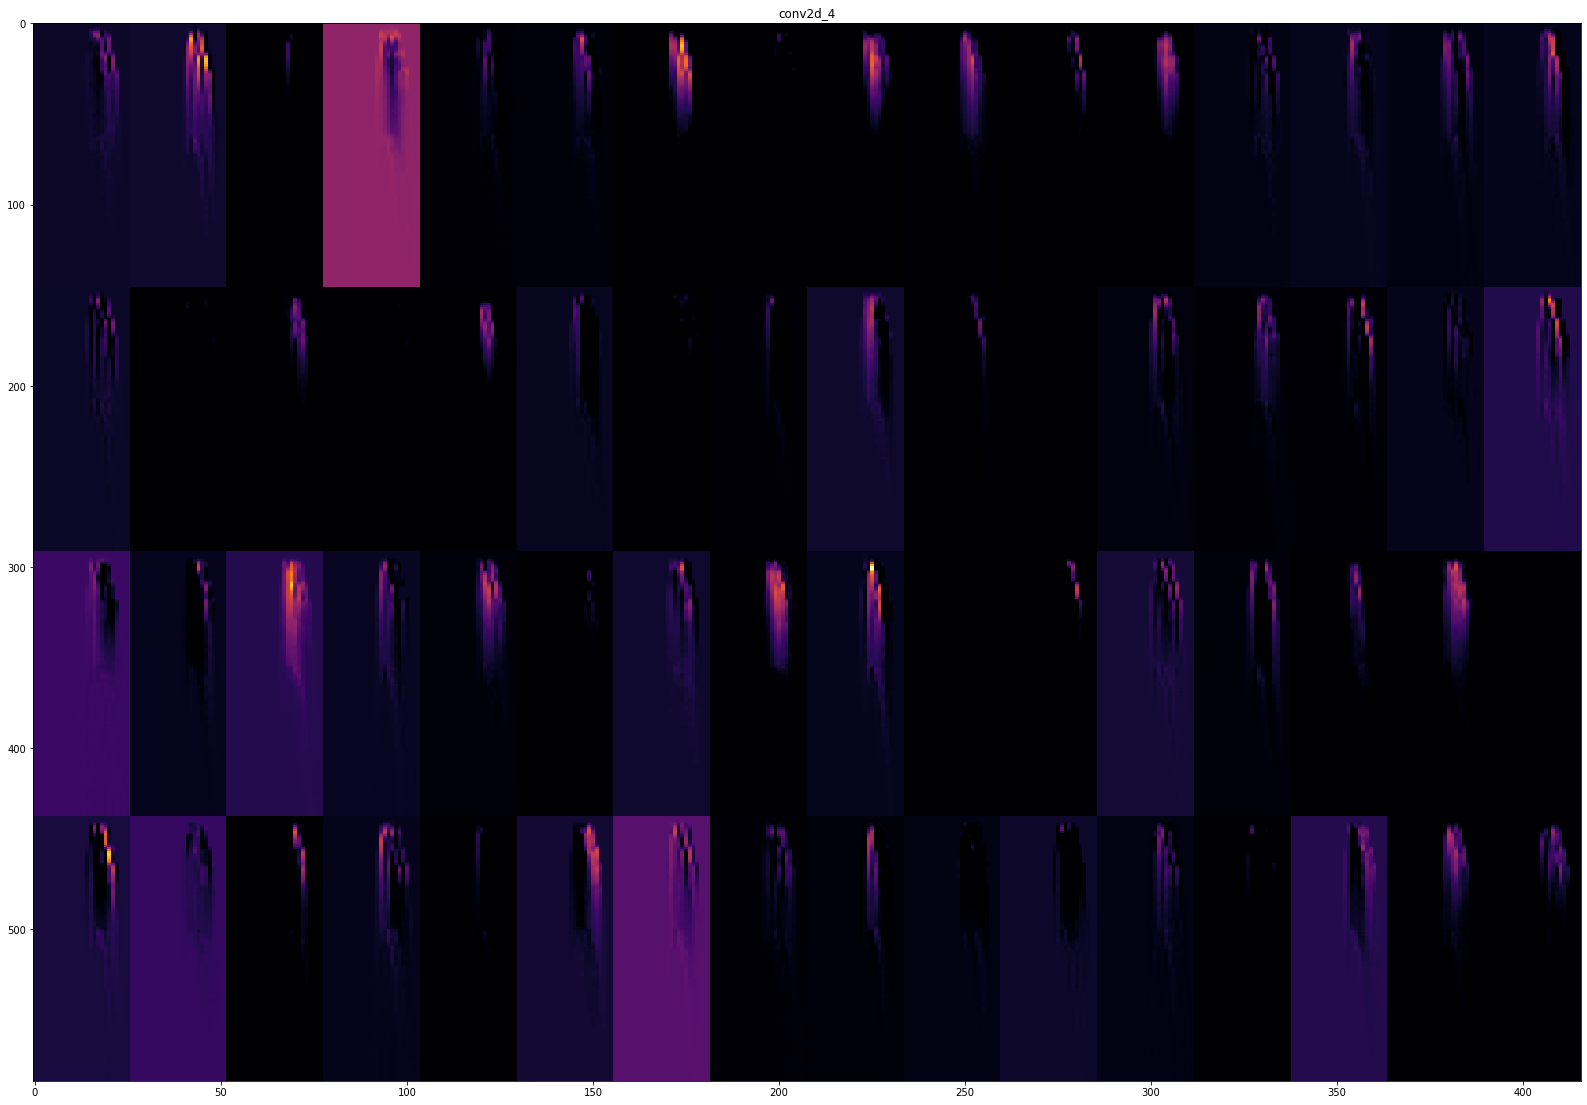

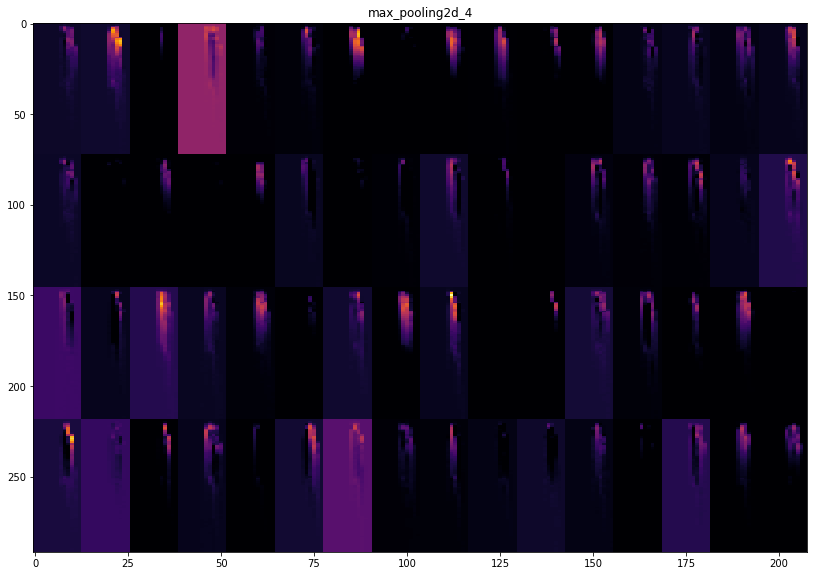

In [31]:
layer_names = []
for layer in model.layers[:6]:
    layer_names.append(layer.name)
print(layer_names)
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    print(layer_name, layer_activation.shape)
    
# The feature map has shape (1, size1, size2, n_features)
    n_features = layer_activation.shape[-1]
    size1 = layer_activation.shape[1]
    size2 = layer_activation.shape[2]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size1 * n_cols, images_per_row * size2))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            #channel_image -= channel_image.mean()
            #channel_image /= channel_image.std()
            #channel_image *= 64
            #channel_image += 128
            #channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size1 : (col + 1) * size1,
                         row * size2 : (row + 1) * size2] = channel_image

    # Display the grid
    scale = 1. / 30
    plt.figure(figsize=(scale *2* display_grid.shape[1],
                        scale* display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='inferno')
    
plt.show()

In [ ]:
preds = model.predict(data[2:3])
print('Predicted:', preds)

In [ ]:
from keras import backend as K

In [64]:
dp = model.output()
print(dp)

TypeError: 'Tensor' object is not callable